# Group 10: Bitbytes  

Lets make visualization to get indepth analysis of Disney Movies trends

Given *reviews of Disneyland*, let's try to predict the **rating** associated with a given review.  
  
We will use a TensorFlow/Keras text model with word embeddings to make our predictions.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
import matplotlib as plt

In [3]:
!pip install iplotter

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import iplotter
from IPython.core.display import HTML

In [6]:
# remove iFrame border for cleaner chart rendering
# increase size of text explanations
HTML("""
<style>
iframe {border:0;}
</style>
""")

In [7]:
df = pd.read_csv('/content/drive/MyDrive/MSDS/4th Semester/data.csv' , encoding='latin-1')

In [8]:
category = df.groupby(['genre']).size()
category

genre
Action                  40
Adventure              129
Black Comedy             3
Comedy                 182
Concert/Performance      2
Documentary             16
Drama                  114
Horror                   6
Musical                 16
Romantic Comedy         23
Thriller/Suspense       24
Western                  7
dtype: int64

In [9]:
# python list
data = [
    ['Movies Genre', 'Number of count'],
    [category.index[0],category[0]],
    [category.index[1],category[1]],
    [category.index[2],category[2]],
    [category.index[3],category[3]],
    [category.index[4],category[4]],
    [category.index[5],category[5]],
    [category.index[6],category[6]],
    [category.index[7],category[7]],
    [category.index[8],category[8]],
    [category.index[9],category[9]],
    [category.index[10],category[10]],
    [category.index[11],category[11]],
]


title = "Movies genre and thier count"

In [10]:
html_code = """
<html>
  <head>
    <script type="text/javascript" src="https://www.gstatic.com/charts/loader.js"></script>
    <script type="text/javascript">
      google.charts.load("current", {packages:["corechart"]});
      google.charts.setOnLoadCallback(drawChart);
      function drawChart() {
        var data = google.visualization.arrayToDataTable(%s);
​
        var options = {
          title: '%s',
          pieHole: 0.7,
          is3D: true,
          sliceVisibilityThreshold: 0.001,
          pieSliceText: 'label',
          
        };
​
        var chart = new google.visualization.PieChart(document.getElementById('donutchart'));
        chart.draw(data, options);
      }
    </script>
  </head>
  <body>
    <div id="donutchart" style="width: 900px; height: 520px;"></div>
  </body>
</html>
"""% (data, title)

In [11]:
# render use jupyter's html function
HTML(html_code)

In [12]:
!pip install plotly

# Visualizations:



Which genre was the most popular ( Highest rated ) between year 2017-2019 in which country? 

In [13]:
import plotly.express as px
df = pd.read_csv("/content/drive/MyDrive/MSDS/4th Semester/data.csv")

px.scatter(df, x="Rating", y="genre", animation_frame="Year_Month", animation_group="Reviewer_Location",
           size="Rating", color="Reviewer_Location", hover_name="Reviewer_Location",
           log_x=True)

Among all the movies realse up to the date which year was highest with inflation adjusted gross ?

In [14]:
import plotly.express as px
df = pd.read_csv("/content/drive/MyDrive/MSDS/4th Semester/data.csv")
'''Among all the movies realse up to the date which year was highest with total_gross ? '''
fig = px.bar(df, x="release_date", y="total_gross")
fig.show() 
fig = px.bar(df, x="release_date", y="inflation_adjusted_gross")
fig.show()

In [17]:
## Converting release_date to date type:
df['release_date'] = pd.to_datetime(df['release_date'])

In [18]:
# Let's create a column named year to visualize later
df['year'] = df['release_date'].dt.date.astype(str).str.split('-', expand=True)[0]

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

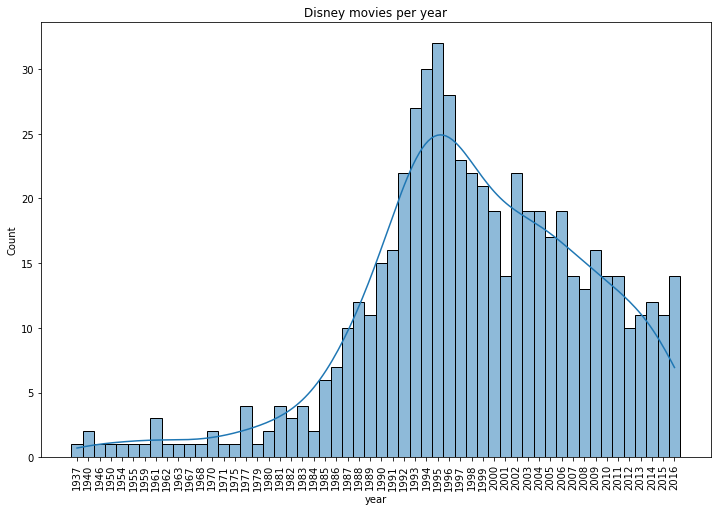

In [21]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
plt.title('Disney movies per year')
sns.histplot(df['year'], kde=True)

# Preprocessing Dataset For Prediction

In [28]:
def get_sequences(texts, tokenizer, train=True, max_seq_length=None):
    sequences = tokenizer.texts_to_sequences(texts)
    
    if train == True:
        max_seq_length = np.max(list(map(len, sequences)))
    
    sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post')
    
    return sequences

In [29]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Limit data to only the review and rating column
    y = df['Rating']
    X = df['Review_Text']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Fit tokenizer
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)
    print("Vocab length:", len(tokenizer.word_index) + 1)
    
    # Convert texts to sequences
    X_train = get_sequences(X_train, tokenizer, train=True)
    X_test = get_sequences(X_test, tokenizer, train=False, max_seq_length=X_train.shape[1])
    
    return X_train, X_test, y_train, y_test, tokenizer

In [31]:
X_train, X_test, y_train, y_test, t = preprocess_inputs(df)

Vocab length: 3563


In [32]:
X_train

array([[  1,  94,   8, ...,   0,   0,   0],
       [  5,  19,  77, ...,   0,   0,   0],
       [  6,   8, 676, ...,   0,   0,   0],
       ...,
       [  5,  35,  99, ...,   0,   0,   0],
       [ 12, 120,  14, ...,   0,   0,   0],
       [ 39,  43,   7, ...,   0,   0,   0]], dtype=int32)

In [33]:
y_train

370    4
342    4
142    5
420    4
6      5
      ..
129    3
144    1
72     4
235    2
37     4
Name: Rating, Length: 405, dtype: int64

# Training Dataset

In [34]:
X_train.shape

(405, 584)

In [36]:
inputs = tf.keras.Input(shape=(584,))

x = tf.keras.layers.Embedding(
    input_dim=3563,
    output_dim=64
)(inputs)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
11/11 [==============================] - 1s 20ms/step - loss: 4.4033 - val_loss: 2.0051
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 1.2234 - val_loss: 1.3178
Epoch 3/100
11/11 [==============================] - 0s 10ms/step - loss: 0.7982 - val_loss: 1.4639
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 0.6984 - val_loss: 1.3063
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 0.5703 - val_loss: 1.1104
Epoch 6/100
11/11 [==============================] - 0s 9ms/step - loss: 0.4579 - val_loss: 1.1763
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 0.2828 - val_loss: 1.1203
Epoch 8/100
11/11 [==============================] - 0s 10ms/step - loss: 0.1465 - val_loss: 1.1203


# Results

In [37]:
y_pred = np.squeeze(model.predict(X_test))

rmse = np.sqrt(np.mean((y_test - y_pred)**2))
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))

print("Model: {:.2f}".format(rmse))
print("R^2 Score: {:.5f}".format(r2))

Model: 0.93
R^2 Score: -0.06174
